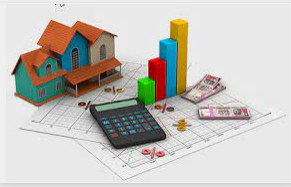

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('/content/House_Data.csv')
df_raw.shape

(13320, 9)

In [3]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


Exploratory Data Analysis

In [5]:
df = df_raw.copy() # get the copy of raw data

In [6]:
# get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()
#observe 75% and max value it shows huge diff

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
# value count of each feature
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print(".........................................")

In [9]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
.........................................
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
16-Jul               1
15-Jun               1
14-Jul               1
16-Nov               1
Name: availability, Length: 81, dtype: int64
.........................................
Whitefield              540
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
kanakapura road           1
Gayathri Nagar            1
Chickpet                  1
Shakthi Nagar             1
Byrasandra Extension      1
Name: location, Length: 1305, dtype: int64
.........................................
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 B

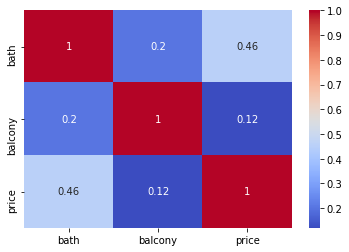

In [10]:
# correlation heatmap
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

# correlation of bath is greater than a balcony with price

**Preare Data for Machine Learning Model**

Data cleaning

In [11]:
df.isnull().sum() # find the homuch missing data available

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
df.isnull().mean()*100 # % of measing value

#society has 41.3% missing value (need to drop)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

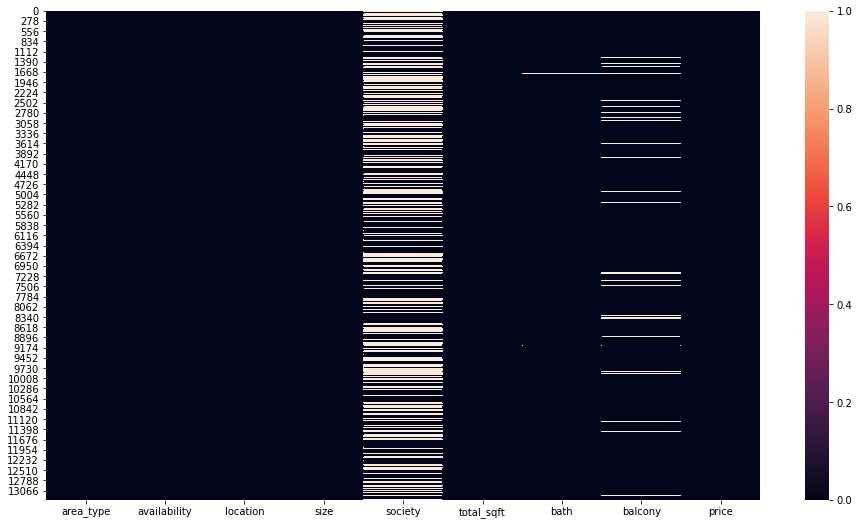

In [13]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [14]:
# Drop ----------> society feature
# because 41.3% missing value
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

In [15]:
# fill mean value in --------> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [16]:
# drop na value rows from df2
# because there is very less % value missing
df3 = df2.dropna()
df3.shape

(13246, 8)

In [17]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [18]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Feature Engineering

In [19]:
# to show all th ecolumns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Converting 'total_sqft' cat feature in numeric

In [20]:
df3['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
750                   52
700                   52
1225                  48
4000                  48
1175                  48


In [21]:
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan

In [22]:
# reset the index of dataframe
df4 = df3.reset_index(drop=True) # drop=True - don't add index column in df

In [23]:
# join df4 and total_srft_int list
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [24]:
df5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [25]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [26]:
# drop na value
df6 = df5.dropna()
df6.shape

(13200, 9)

In [27]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


## Working on <<<< Size >>>> feature

In [28]:
df6['size'].value_counts()

# size feature shows the number of rooms 

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
8 Bedroom       83
7 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
13 BHK           1
43 Bedroom       1
16 BHK           1
27 BHK           1
12 Bedroom       1
14 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [29]:
"""
in  size feature we assume that 
2 BHK = 2 Bedroom == 2 RK
so takes only number and remove sufix text
"""
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)

In [30]:
df6 = df6.reset_index(drop=True)

In [31]:
# join df6 and list size_int
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [32]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


## Finding Outlier and Removing

In [33]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* bath *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


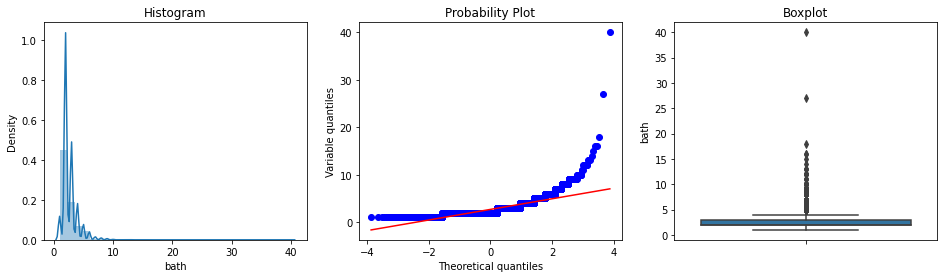

******* balcony *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


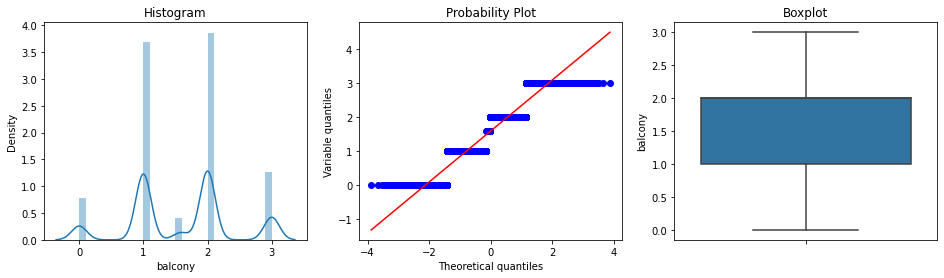

******* total_sqft_int *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


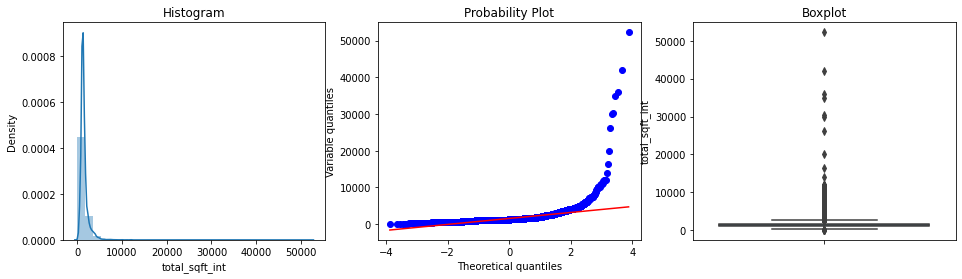

******* bhk *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


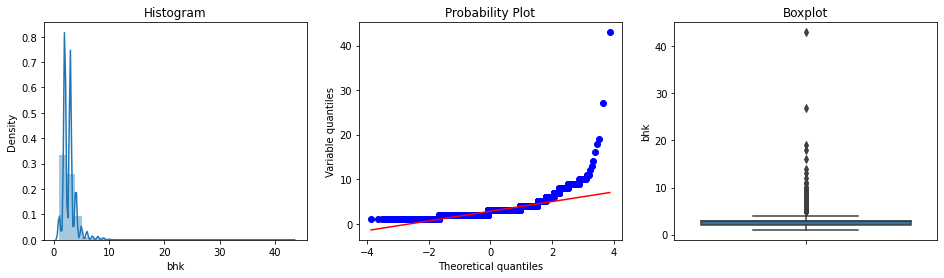

******* price *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


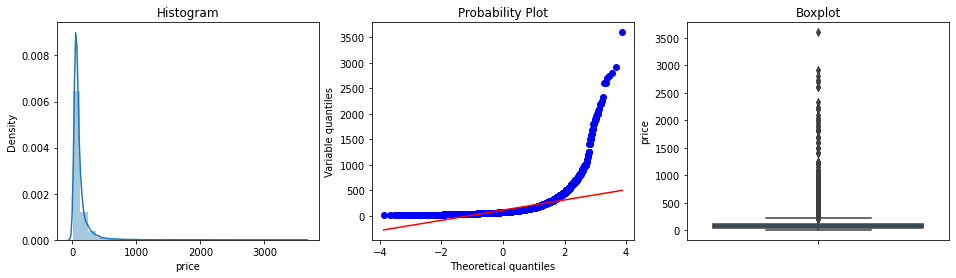

In [34]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df7, var)

  # here we observe outlier using histogram,, qq plot and boxplot 

In [35]:
# here we consider  1 BHK requierd min 350 sqft are
df7[df7['total_sqft_int']/df7['bhk'] < 350].head()

# no we found outliers 

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [36]:
# if 1 BHK total_sqft are < 350 then we ae going to remove them
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 350)]
df8.shape

(12106, 10)

In [37]:
# create new feature that is price per squre foot 
# it help to find the outliers

#price in lakh so conver into rupee and then / by total_sqft_int
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']  
df8.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [38]:
df8.price_per_sqft.describe()

#here we can see huge difference between min and max price_per_sqft
# min 6308.502826 max 176470.588235

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

df9 = remove_pps_outliers(df8)
df9.shape

(8888, 11)

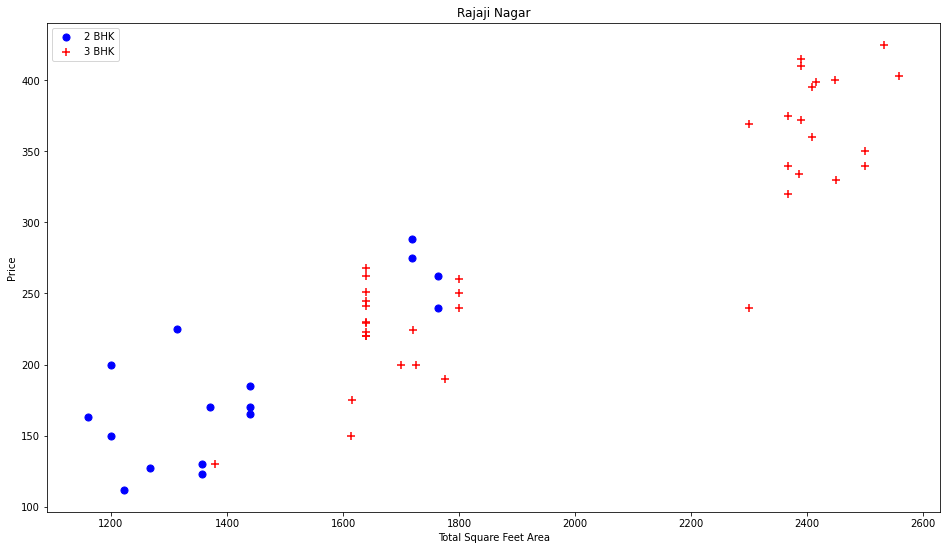

In [40]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df9, "Rajaji Nagar")

# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier

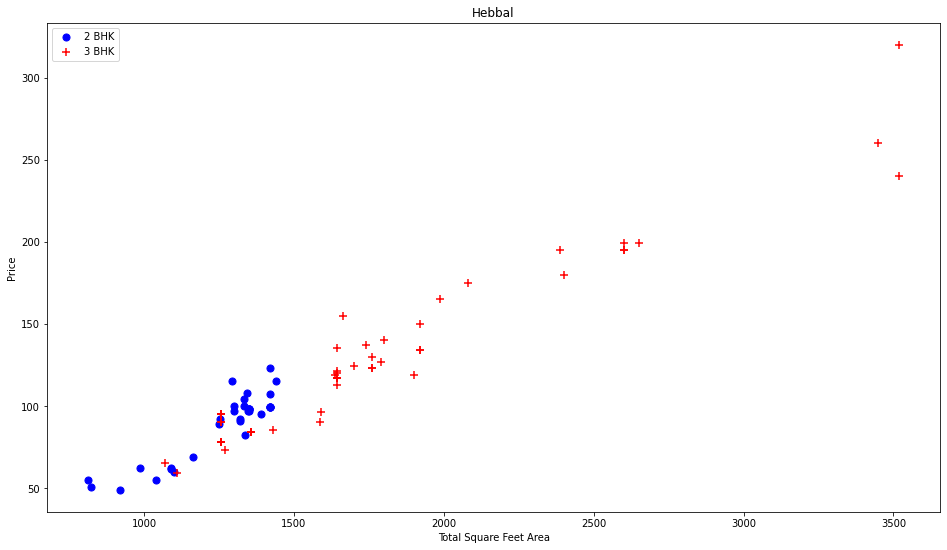

In [41]:
plot_scatter_chart(df9, "Hebbal")
# in below scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier

In [42]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df10 = remove_bhk_outliers(df9)
df10.shape

(7194, 11)

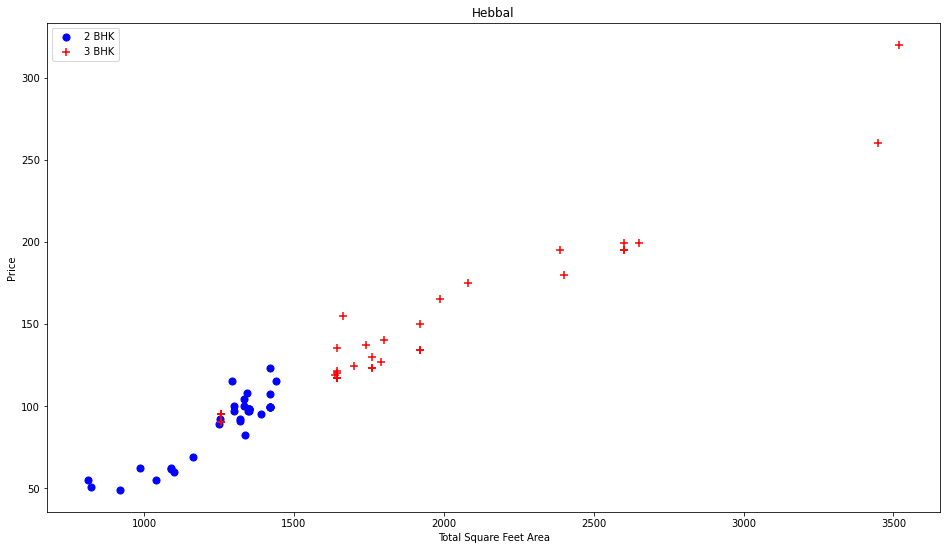

In [43]:
plot_scatter_chart(df10, "Hebbal")
# In below scatter plot most of the red data point remove fron blue points

### Remove outliers using the help of 'bath' feature

In [44]:
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [45]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [46]:
# here we are considering data only total no. bathroom =  bhk + 1
df11 = df10[df10.bath < df10.bhk+2]
df11.shape

(7120, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

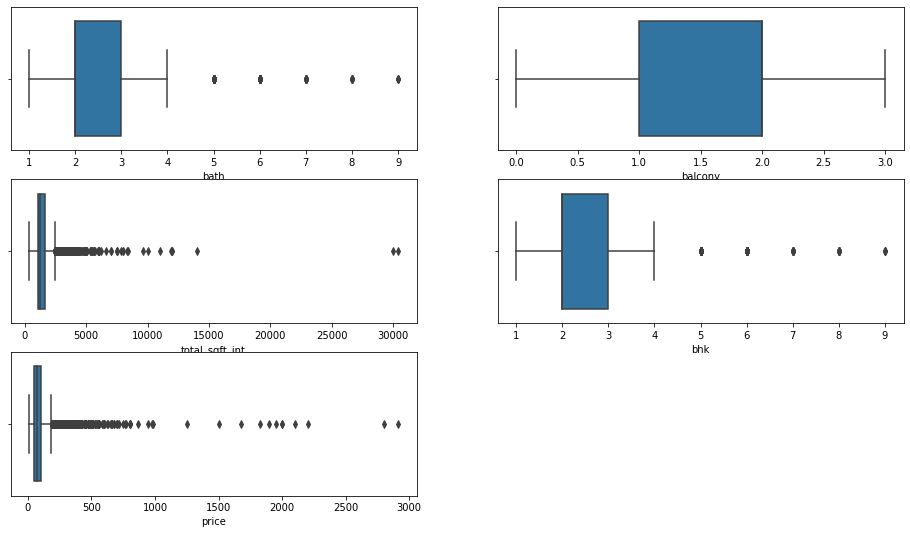

In [47]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
  plt.subplot(3,2,i+1)
  sns.boxplot(df11[var])

In [48]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [49]:
df12 = df11.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
df12.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [50]:
df12.to_csv("clean_data.csv", index=False) # test ml model on this data
# ML model train on this data and got best score >>>> XGBoost=0.914710

# Categorical Variable Encoding

In [51]:
df13 = df11.drop(["size","total_sqft"], axis =1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [52]:
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type','availability','location'])
df14.shape

(7120, 820)

In [53]:
df14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bag

In [54]:
df14.to_csv('oh_encoded_data.csv', index=False) # test ml model on this data

## Working on <<<<<< area_type >>>>> feature

In [55]:
df13['area_type'].value_counts()

Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: area_type, dtype: int64

In [56]:
df15 = df13.copy()
# appy Ohe-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)
df15.shape

(7120, 12)

In [57]:
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0


## Working with <<<<< availability >>>>> Feature

In [58]:
df15["availability"].value_counts()

Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
19-Dec            101
18-Jul             76
18-Mar             72
21-Dec             55
20-Dec             54
18-Jun             51
19-Mar             48
18-Feb             36
18-Nov             26
19-Jun             24
18-Oct             24
19-Jan             19
18-Sep             18
20-Jan             18
18-Jan             17
17-Dec             14
17-Oct             13
21-Mar             13
21-Jun             13
19-Sep             12
19-Aug             11
19-Jul             11
17-Jul             10
21-Jan             10
19-Apr              9
17-Jun              9
22-Dec              7
19-Oct              7
20-Jun              7
17-May              6
21-Jul              6
17-Sep              6
20-Aug              6
20-Oct              6
21-Feb              5
20-Sep              5
20-Nov              4
22-Jan              4
17-Apr              4
21-Oct              4
17-Nov    

In [59]:
# in availability feature, 10525 house 'Ready to Move" and remaining will be redy on perticuler date
# so we crate new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
df15["availability_Ready To Move"] = np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape

(7120, 13)

In [60]:
df15.tail()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
8883,Super built-up Area,Ready To Move,frazertown,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1
8884,Super built-up Area,18-Nov,manyata park,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0
8885,Plot Area,Ready To Move,tc.palya,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1
8886,Plot Area,18-Apr,tc.palya,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0
8887,Plot Area,18-Apr,tc.palya,2.0,1.0,78.00,1400.0,3,5571.428571,0,0,1,0


## Working on <<<< Location >>>> feature

In [61]:
location_value_count = df15['location'].value_counts()
location_value_count

Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Raja Rajeshwari Nagar                  116
Haralur Road                           116
Marathahalli                           116
Bannerghatta Road                      108
Hennur Road                            108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Kasavanhalli                            53
Bellandur                               53
Begur Road                              51
Banashankari                            49
Kothanur                                49
Hormavu    

In [62]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City',
       'Raja Rajeshwari Nagar', 'Haralur Road', 'Marathahalli',
       'Bannerghatta Road', 'Hennur Road', 'Uttarahalli', 'Thanisandra',
       'Electronic City Phase II', 'Hebbal', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar',
       'Kasavanhalli', 'Bellandur', 'Begur Road', 'Banashankari', 'Kothanur',
       'Hormavu', 'Harlur', 'Akshaya Nagar', 'Electronics City Phase 1',
       'Jakkur', 'Varthur', 'Chandapura', 'Ramamurthy Nagar', 'HSR Layout',
       'Hennur', 'Kundalahalli', 'Ramagondanahalli', 'Kaggadasapura',
       'Koramangala', 'Hulimavu', 'Hoodi', 'Budigere', 'Malleshwaram',
       'Hegde Nagar', '8th Phase JP Nagar', 'Gottigere', 'Yeshwanthpur',
       'JP Nagar', 'Channasandra', 'Bisuvanahalli', 'Indira Nagar',
       'Vittasandra', 'Hosa Road', 'Kengeri', 'Sahakara Nagar', 'Vijayanagar',
       'Brookefield', 'Old Airport Road', 'Green Glen Layout', 'Bommasan

In [63]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df16 = df15.copy()
for cat_var in location_gert_20:
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
df16.shape

(7120, 111)

In [64]:
df16.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Marathahalli,location_Bannerghatta Road,location_Hennur Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_Chandapura,location_Ramamurthy Nagar,location_HSR Layout,location_Hennur,location_Kundalahalli,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Hulimavu,location_Hoodi,location_Budigere,location_Malleshwaram,location_Hegde Nagar,location_8th Phase JP Nagar,location_Gottigere,location_Yeshwanthpur,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Indira Nagar,location_Vittasandra,location_Hosa Road,location_Kengeri,location_Sahakara Nagar,location_Vijayanagar,location_Brookefield,location_Old Airport Road,location_Green Glen Layout,location_Bommasandra,location_Balagere,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Jigani,location_Thigalarapalya,location_Yelahanka New Town,location_Ambedkar Nagar,location_Mysore Road,location_Talaghattapura,location_Kadugodi,location_Devanahalli,location_Dodda Nekkundi,location_Frazer Town,location_Kanakapura,location_Attibele,location_Lakshminarayana Pura,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_5th Phase JP Nagar,location_Nagarbhavi,location_CV Raman Nagar,location_Jalahalli,location_Kudlu,location_Kengeri Satellite Town,location_Kalena Agrahara,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Horamavu Agara,location_BTM 2nd Stage,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_Mahadevpura,location_Tumkur Road,location_Horamavu Banaswadi,location_Domlur
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Drop categorical variable

In [65]:
df17 = df16.drop(["area_type","availability",'location'], axis =1)
df17.shape

(7120, 108)

In [66]:
df17.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Marathahalli,location_Bannerghatta Road,location_Hennur Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_Chandapura,location_Ramamurthy Nagar,location_HSR Layout,location_Hennur,location_Kundalahalli,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Hulimavu,location_Hoodi,location_Budigere,location_Malleshwaram,location_Hegde Nagar,location_8th Phase JP Nagar,location_Gottigere,location_Yeshwanthpur,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Indira Nagar,location_Vittasandra,location_Hosa Road,location_Kengeri,location_Sahakara Nagar,location_Vijayanagar,location_Brookefield,location_Old Airport Road,location_Green Glen Layout,location_Bommasandra,location_Balagere,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Jigani,location_Thigalarapalya,location_Yelahanka New Town,location_Ambedkar Nagar,location_Mysore Road,location_Talaghattapura,location_Kadugodi,location_Devanahalli,location_Dodda Nekkundi,location_Frazer Town,location_Kanakapura,location_Attibele,location_Lakshminarayana Pura,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_5th Phase JP Nagar,location_Nagarbhavi,location_CV Raman Nagar,location_Jalahalli,location_Kudlu,location_Kengeri Satellite Town,location_Kalena Agrahara,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Horamavu Agara,location_BTM 2nd Stage,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_Mahadevpura,location_Tumkur Road,location_Horamavu Banaswadi,location_Domlur
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df17.to_csv('ohe_data_reduce_cat_class.csv', index=False) 

In [68]:
X = df17.drop("price", axis=1)
y = df17['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7120, 107)
Shape of y =  (7120,)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 107)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 107)
Shape of y_test =  (1424,)


In [70]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

**Machine Learning Model Training**

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [72]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [73]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.7903837092682244, 64.89843531105619)

In [74]:
# Lasso 
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8036372994936767, 62.813241864587205)

In [75]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.2630802200711362
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.20638035840828184, 126.27806378079053)

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.8854443012292449, 47.97666545875881)

In [77]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) # with 0.8838865742273464
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse

[11:20:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.8759391907485039, 49.92740744112327)

In [78]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

                    Model     Score        RMSE
0       Linear Regression  0.790384   64.898435
1                   Lasso  0.803637   62.813242
2  Support Vector Machine  0.206380  126.278064
3           Random Forest  0.885444   47.976665
4                 XGBoost  0.875939   49.927407


In [79]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean() # 0.9652425691235843)'''

(array([0.99187938, 0.9608181 , 0.99711783, 0.97178752, 0.96673106,
        0.93646055, 0.93101841, 0.90152278, 0.9961549 , 0.98820449]),
 0.9641695021236825)

In [80]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

In [81]:
xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.6, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

[11:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.895696080179051

In [82]:
xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.9, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

[11:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8840983866988691

In [83]:
cvs = cross_val_score(xgb_tune2, X_train,y_train, cv = 5)
cvs, cvs.mean() #  0.9706000326331659'''
print("\n")
np.sqrt(mean_squared_error(y_test, xgb_tune2.predict(X_test)))

[11:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.




48.25768129834004

In [84]:
# it help to get predicted value of hosue  by providing features value 
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):

  x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model

  # adding feature's value accorind to their column index
  x[0]=bath
  x[1]=balcony
  x[2]=total_sqft_int
  x[3]=bhk
  x[4]=price_per_sqft

  if "availability"=="Ready To Move":
    x[8]=1

  if 'area_type'+area_type in X.columns:
    area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
    x[area_type_index] =1

    #print(area_type_index)

  if 'location_'+location in X.columns:
    loc_index = np.where(X.columns=="location_"+location)[0][0]
    x[loc_index] =1

    #print(loc_index)

  #print(x)

  # feature scaling
  x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
  #print(x)

  return model.predict([x])[0] # return the predicted value by train XGBoost model

In [85]:
predict_house_price(model=xgb_tune2, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")

145.91656

In [86]:
##test sample
#area_type	availability	location	bath	balcony	price	total_sqft_int	bhk	price_per_sqft
#2	Super built-up Area	Ready To Move	Devarabeesana Halli	3.0	2.0	150.0	1750.0	3	8571.428571

predict_house_price(model=xgb_tune2, bath=3,balcony=2,total_sqft_int=1750,bhk=3,price_per_sqft=8571.428571,area_type="Super built-up",availability="Ready To Move",location="Devarabeesana Halli")

143.71669

In [87]:
##test sample
#area_type	availability	location	bath	balcony	price	total_sqft_int	bhk	price_per_sqft
#1	Built-up Area	Ready To Move	Devarabeesana Halli	3.0	3.0	149.0	1750.0	3	8514.285714
predict_house_price(model=xgb_tune2,bath=3,balcony=3,total_sqft_int=1750,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")

143.71669

In [88]:
import joblib
# save model
joblib.dump(xgb_tune2, 'House_Price_Prediction_model.pkl')
joblib.dump(rfr, 'House_Price_Prediction_model.pkl')

['House_Price_Prediction_model.pkl']

In [89]:
# load model
House_Price_Prediction_model = joblib.load("House_Price_Prediction_model.pkl")

In [90]:
# predict house price
predict_house_price(House_Price_Prediction_model,bath=3,balcony=3,total_sqft_int=800,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")

66.30899999999998